Привет, меня зовут Влад. Студент когорты da-17.
Сразу извиняюсь за опечатки.

Привет, Влад! 

Меня зовут Светлана Медведева и я буду проверять Твою работу. Предлагаю общаться на "ты". 

При обнаружении у Тебя в работе ошибки, в первый раз я лишь укажу на ее наличие и у Тебя будет возможность самому найти её и исправить. В реальной работе твой начальник будет поступать также, а я пытаюсь подготовить тебя именно к работе аналитиком. Однако если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку.

Просьба при доработке работы оставлять мои комментарии без изменений.

Комментарии я разделяю на следующие категории:

<div class="alert alert-block alert-success">
В случае если всё верно!
</div>


<div class="alert alert-block alert-warning">
В случае если можно что-то доработать, но эта доработка не критична или если есть варианты улучшения работы.
</div>

<div class="alert alert-block alert-danger">
Замечания, которые нужно исправить. Без исправления этих замечаний проект принят не может быть.
</div>

### <font color='blue'>Резензия на работу v. 1</font>
* В целом хорошая работа, но требуются доработки.
* Молодец, что детально проанализировал построенные графики и сделал верные выводы. 
* Отдельный плюс за определение расположения улиц.
* Однако, нужно добавить рекомендации по открытию нового заведения и доработать презентацию.
* Успехов!

### <font color='blue'>Резензия на работу v. 2</font>
* Молодец, Ты успешно выполнил доработки.
* Работа зачтена :)
* Успехов на с!

#### О проекте

Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?
Вы — гуру аналитики, и партнёры просят вас подготовить исследование рынка. У вас есть открытые данные о заведениях общественного питания в Москве.

In [1]:
import numpy as np
import pandas as pd

from IPython import display 
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go

import re

В этот раз я немного заморочился с визуализацией, прочитав несколько статей предложенных Практикумом и вылезших в рекомендациях сделал свою палитру цветов для графиков.

None


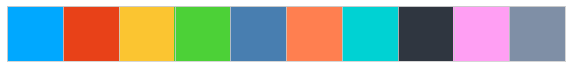

In [2]:
#блок с параметрами визуализации
sns.set_style("whitegrid")
# создаем список с цветами в формате HEX
colors = ["#00a8ff", "#e84118", "#fbc531", "#4cd137", "#487eb0", "#ff7f50", "#00d2d3", "#2f3640", "#ff9ff3", "#7f8fa6"]
sns.set_palette(sns.color_palette(colors))
# назвначаем эту политру и выводим для примера
customPalette = sns.set_palette(sns.color_palette(colors))
print(sns.palplot(colors))

%config InkineBackend.figure_format = 'retina'

### Оглавление
1. [Открытие, ознакомление с данными](#start)
2. [Подготовка данных, предобработка данных](#preprocessing)
3. [Анализ данных](#prt1)
    * [Виды заведений](#count)
    * [Разделение на сетевые/несетевые](#chain)
    * [Парсинг названия улицы](#pars)
    * [Самые популярные улицы](#top10)
    * [Районы с малопопулярными улицами](#only1)
3. [Презентация](#prt2)
4. [Выводы](#answers)

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Отлично, что кратко описал проект и добавил содержание со ссылками.
</div>

#### Загрузим данные <a id="start"></a>

In [3]:
df = pd.read_csv('/datasets/rest_data.csv')

In [4]:
df

id             object_name chain object_type  \
0      151635                 СМЕТАНА   нет        кафе   
1       77874                  Родник   нет        кафе   
2       24309         Кафе «Академия»   нет        кафе   
3       21894              ПИЦЦЕТОРИЯ    да        кафе   
4      119365  Кафе «Вишневая метель»   нет        кафе   
...       ...                     ...   ...         ...   
15361  208537             Шоколадница    да        кафе   
15362  209264             Шоколадница    да        кафе   
15363  209186             Шоколадница    да        кафе   
15364  221900             Шоколадница    да        кафе   
15365  222535             Шоколадница    да        кафе   

                                                 address  number  
0             город Москва, улица Егора Абакумова, дом 9      48  
1      город Москва, улица Талалихина, дом 2/1, корпус 1      35  
2              город Москва, Абельмановская улица, дом 6      95  
3                город Москва, Абрамцевская улица, дом 1      40  
4      город Москва, Абрамцевская улица, дом 9, корпус 1      50  
...                                                  ...     ...  
15361       город Москва, 3-й Крутицкий переулок, дом 18      50  
15362           город Москва, улица Земляной Вал, дом 33      10  
15363           город Москва, улица Земляной Вал, дом 33      20  
15364  город Москва, поселение Московский, Киевское ш...      36  
15365             город Москва, Ходынский бульвар, дом 4      10  

[15366 rows x 6 columns]

In [5]:
#функция просмотра основной информации о таблице 
def preprocessing (data):
    info = data.info()
    print('Информация о типах данных', info)
    print('\n', "Размер таблицы :", data.shape)
    print('\n', "Проверка столбцов на наличие пустых значений в ячейках :", '\n', data.isna().mean())
    print('\n',"Проверка на наличие дубликатов :", "\n", data.duplicated().sum())
    print('\n', "Информация о таблице :", "\n", data.describe())

In [6]:
preprocessing(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB
Информация о типах данных None

 Размер таблицы : (15366, 6)

 Проверка столбцов на наличие пустых значений в ячейках : 
 id             0.0
object_name    0.0
chain          0.0
object_type    0.0
address        0.0
number         0.0
dtype: float64

 Проверка на наличие дубликатов : 
 0

 Информация о таблице : 
                   id        number
count   15366.000000  15366.000000
mean   119720.066901     59.547182
std     73036.130732     74.736833
min       838.000000      0.000000
25%     28524.000000     12.000000
50%    144974.500000     40.000000
75%    184262.250000     80.000000
max    223439.000000   

Таблица имеет 15366 строк, среди них не обнаружено дубликатов. Пустых ячеек тоже везде по нулям.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Отлично, явных дубликатов и пропусков нет.
</div>

Проверим отдельные столбцы на наличие неявных дубликатов. Посмотрим количество уникальных значений исходных таблиц и после приведения значений в ячейках к нижнему регистру.

In [7]:
df['object_type'].value_counts()

кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

В графе "тип объекта общественного питания" - дубликатов нет. Уже можем сделать вывод что самая популярная категория с большим отрывом - `кафе`.

In [8]:
df['object_name'].value_counts()

Столовая                         267
Кафе                             236
Шаурма                           234
KFC                              155
Шоколадница                      142
                                ... 
Хачапури, Одесса -мама             1
Пивзавод ресторан Brotundbeer      1
Кафе «Элла 24»                     1
Ресторан «ХеппиЭнд»                1
Столовая «Школа 639»               1
Name: object_name, Length: 10393, dtype: int64

In [9]:
df['object_name'] = df['object_name'].str.lower()

In [10]:
df['object_name'].value_counts()

столовая           321
кафе               278
шаурма             250
шоколадница        158
kfc                155
                  ... 
лимон                1
вай нот              1
кафе «суши wok»      1
кафе 1639            1
mad man              1
Name: object_name, Length: 9924, dtype: int64

Видим что до приведения строк к нижнему регистру в графе "object_name" было 10393 уникальных значения, а после уменьшилось до 9924.

Аналогично проверим адреса: 

In [11]:
df['address'].value_counts()

город Москва, Ходынский бульвар, дом 4            95
город Москва, Пресненская набережная, дом 2       63
город Москва, проспект Мира, дом 211, корпус 2    60
город Москва, Кировоградская улица, дом 13А       53
город Москва, площадь Киевского Вокзала, дом 2    48
                                                  ..
город Москва, Бутырская улица, дом 77              1
город Москва, Авиационный переулок, дом 5          1
город Москва, Ленинский проспект, дом 34/1         1
город Москва, Енисейская улица, дом 12А            1
город Москва, улица Пржевальского, дом 2           1
Name: address, Length: 9108, dtype: int64

In [12]:
df['address'] = df['address'].str.lower()

In [13]:
df['address'].value_counts()

город москва, ходынский бульвар, дом 4              95
город москва, пресненская набережная, дом 2         63
город москва, проспект мира, дом 211, корпус 2      60
город москва, кировоградская улица, дом 13а         53
город москва, площадь киевского вокзала, дом 2      48
                                                    ..
город москва, фрунзенская набережная, дом 36/2       1
город москва, улица седова, дом 15, корпус 2         1
город москва, улица казакова, дом 18, строение 1     1
город москва, соколово-мещерская улица, дом 29       1
город москва, улица берзарина, дом 8                 1
Name: address, Length: 9108, dtype: int64

В графе "адрес" все значения записаны корректно, дублирующихся адресов нет.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Молодец, что проверил наличие неявных дубликатов.
</div>

#### Выводы:

Мы провели небольшую предобработку исходных данных. В предоставленных данных явных дубликатов и пропусков в столбцах не обнаружено. Значения граф "адрес" и "название заведения" приведены к нижнему регистру, для избежания ошибок при подсчетах уникальных значений.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Ок, данные загружены. Можно переходить к предобработке и анализу данных.
</div>

#### Анализ данных <a id="prt1"></a>

##### Исследуем соотношение видов объектов общественного питания по количеству. <a id="count"></a>


Создадим таблицу, куда запишем тип заведения и их количество:

In [14]:
object_type = df['object_type'].value_counts().reset_index()
object_type['percent'] = (object_type['object_type'] / sum(object_type['object_type'])).round(2)
object_type.columns = ['type', 'count', 'percent']
object_type

type  count  percent
0                               кафе   6099     0.40
1                           столовая   2587     0.17
2                           ресторан   2285     0.15
3  предприятие быстрого обслуживания   1923     0.13
4                                бар    856     0.06
5                              буфет    585     0.04
6                          кафетерий    398     0.03
7                         закусочная    360     0.02
8          магазин (отдел кулинарии)    273     0.02

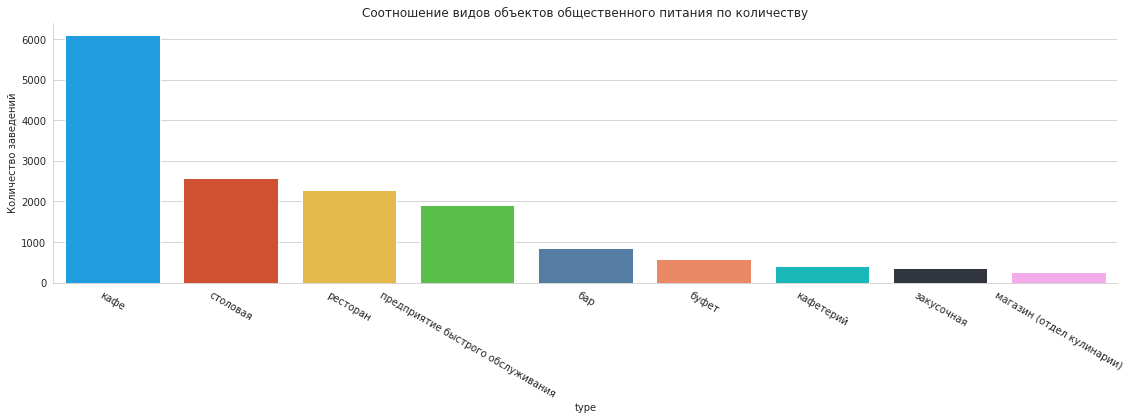

In [15]:
plt.figure(figsize=(16, 6))

ax = sns.barplot(x="type", y="count", data=object_type, palette=customPalette)

ax.set_title('Cоотношение видов объектов общественного питания по количеству')
ax.set(ylabel='Количество заведений')

#поворот подписей по оси Х
ax.set_xticklabels(ax.get_xticklabels(),rotation=-30)

#задаем параметры текста подписей
sns.set_context("notebook", font_scale=1)

#убираем рамку, оставляя оси
sns.despine()
plt.tight_layout() #необходимо для того чтобы подписи не обрезались
#plt.savefig("figure1.png") # save as png
plt.show()


<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Отличный график, молодец, что не забыл подписи по осям и заголовок. Отдельных плюс за то, что отсортировал значения по возрастанию.
</div>

По количеству заведений на первом месте, с большим отрывом занимают "кафе" (более 6 тысяч заведений), далее идут категории "столовые" и "рестораны" (≈2,6 и 2,3 тысячи заведений соответсвенно)

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Подумай, пожалуйста, с чем связано преобладание кафе?
</div>

<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ СТУДЕНТА:</b>
    
Как мне кажется тут сразу несколько факторов:
1. Ниже порог входа в эту сферу: меньше посадочных мест, не обязательно иметь фабрику-кухню и большую площадь зала; из первого следует и меньшее минимальное количество персонала необходимое для открытия заведения; не обязательны лицензии на крепкий алгоколь (как в случае с барами)
2. Под понятием кафе сегодня объединяются сразу очень большое количество форматов заведений: от кофепоинта на вокзале -  до винотек с уникальными  и многотысячными наименованиями в винной карте, от небольших speakeasy мест  до больших стейк-хаусов и т.д. 
3. Много сетевых заведений можно отнести в эту категорию
4. Именуя и причисляя себя к "ресторанам" - сложнее держать марку и качество сервиса, так как зачастую ожидания посетителей сразу выше (отсюда больше новых заведений открываются в формате кафе).
    
    Думаю если немного поразмышлять можно легко дополнить список

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Да, все перечисленные Тобой причины имеют место быть. Ещё можно сказать, что в кафе в отличие от ресторанов, как правило, цены ниже и обслуживание более быстрое.
</div>

##### Исследуем соотношение сетевых и несетевых заведений по количеству <a id="chain"></a>

In [16]:
df1 = df['chain'].value_counts().reset_index()
df1

index  chain
0   нет  12398
1    да   2968

In [17]:
df['chain'].value_counts(1)

нет    0.806846
да     0.193154
Name: chain, dtype: float64

In [18]:
plt.figure(figsize=(5, 6))
%matplotlib inline
fig = go.Figure(data=[go.Pie(labels=df1['index'], values=df1['chain'], hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.30
))
fig.update_layout(
    title={
        'text': "Отношение сетевых и несетевых заведений",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
#plt.savefig("figure2.png") # save as png
fig.show()

Из графика видим, что сетевых заведений к несетевым 19,3% / 80,7%. Несетевые заведения в большинстве, их 4 раза больше.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Отличный анализ :)
    
А как Ты думаешь с чем связано преобладание несетевых заведений?
</div>

<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ СТУДЕНТА:</b>
    
Насколько я знаю последние пару лет в целом рынок франшиз перестал так активно расти, как это было 4-5 лет назад.     Преобладание несетевых заведений может быть связано с этим. Плюс многие предприниматели новой волны уже имеют неплохой опыт и могут сами справляться с "хозяйством", открывая заведения, под собственными вывесками. Рынок, тем более в таком городе как Москва, стал очень разнообразным и, многие пытаясь в том числе найти "золотую жилу", ищут новые и новые форматы. Да и мне кажется было бы скучно, если приходилось бы во всем городе выискивать "несетевые заведения", как это иногда у меня происходит на крупных фудкортах, когда ты не хочешь ни мак, ни кфц, ни крошку-картошку) 

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Отличное объяснение причины преобладания несетевых заведений :)
</div>

##### Для какого вида объекта общественного питания характерно сетевое распространение?


Рассмотрим какой процент по типу заведений являются сетевыми и несетевыми. 

Сгруппируем данные, посчитаем разделяя на сетевые и несетевые заведения.

In [19]:
df1 = df.groupby(['object_type','chain'])['object_type'].agg({'count'}).reset_index()
df1

object_type chain  count
0                                 бар    да     37
1                                 бар   нет    819
2                               буфет    да     11
3                               буфет   нет    574
4                          закусочная    да     56
5                          закусочная   нет    304
6                                кафе    да   1396
7                                кафе   нет   4703
8                           кафетерий    да     52
9                           кафетерий   нет    346
10          магазин (отдел кулинарии)    да     78
11          магазин (отдел кулинарии)   нет    195
12  предприятие быстрого обслуживания    да    791
13  предприятие быстрого обслуживания   нет   1132
14                           ресторан    да    544
15                           ресторан   нет   1741
16                           столовая    да      3
17                           столовая   нет   2584

Выведем графики распределения объектов общественного питания.

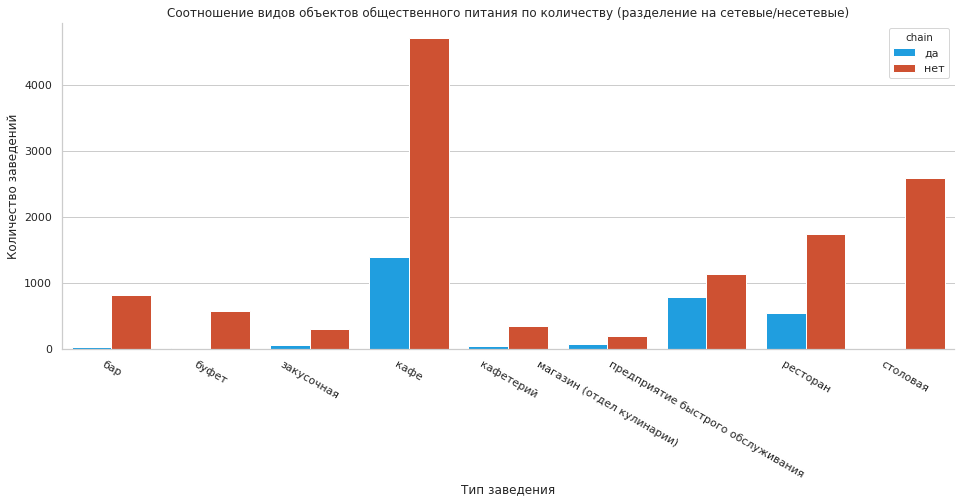

In [20]:
plt.figure(figsize=(16, 6))

ax = sns.barplot(x="object_type", y="count", hue = 'chain',  data=df1, palette=customPalette)

ax.set_title('Cоотношение видов объектов общественного питания по количеству (разделение на сетевые/несетевые)')
ax.set(xlabel='Тип заведения', ylabel='Количество заведений')

#поворот подписей по оси Х
ax.set_xticklabels(ax.get_xticklabels(),rotation=-30)

#задаем параметры текста подписей
sns.set_context("notebook", font_scale=1)

#убираем рамку, оставляя оси
sns.despine()
plt.show()

График не сильно информативен. Но можем увидеть, что по всем типам - количество несетевых заведений выше.  
Однако - есть одна категория, где сетевые заведения наиболее близки по количеству заведений, это "предприятия быстрого обслуживания".

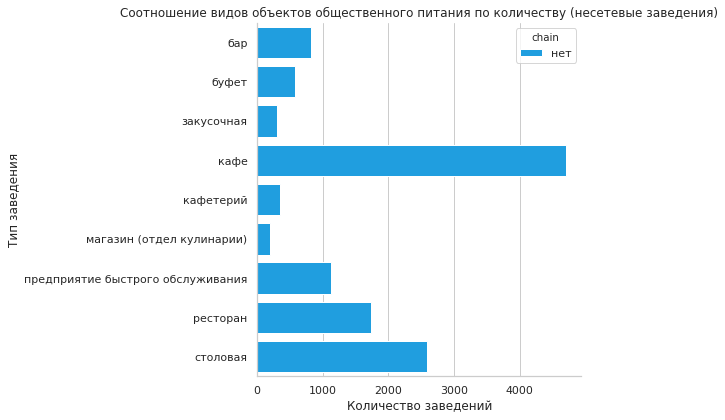

In [21]:
plt.figure(figsize=(9, 6))

ax = sns.barplot(x="count", y="object_type", hue = 'chain',  data=df1.query('chain == "нет"'), palette=customPalette, orient = "h")
ax.set_title('Cоотношение видов объектов общественного питания по количеству (несетевые заведения)')
ax.set(xlabel='Количество заведений', ylabel='Тип заведения')

#поворот подписей по оси Х
#ax.set_xticklabels(ax.get_xticklabels(),rotation=-30)

#задаем параметры текста подписей
sns.set_context("notebook", font_scale=1)

#убираем рамку, оставляя оси
sns.despine()
plt.tight_layout() #необходимо для того чтобы подписи не обрезались
#plt.savefig("figure3.png") # save as png
plt.show()

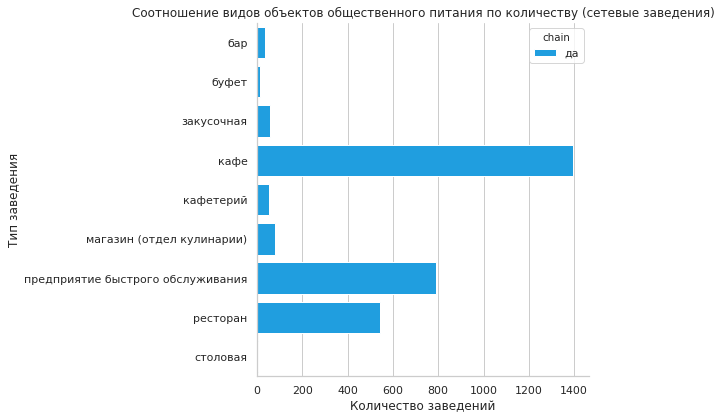

In [22]:
plt.figure(figsize=(9, 6))

ax = sns.barplot(x="count", y="object_type", hue = 'chain',  data=df1.query('chain == "да"'), palette=customPalette, orient = "h")
ax.set_title('Cоотношение видов объектов общественного питания по количеству (сетевые заведения)')
ax.set(xlabel='Количество заведений', ylabel='Тип заведения')

#поворот подписей по оси Х
#ax.set_xticklabels(ax.get_xticklabels(),rotation=-30)

#задаем параметры текста подписей
sns.set_context("notebook", font_scale=1)

#убираем рамку, оставляя оси
sns.despine()
plt.tight_layout() #необходимо для того чтобы подписи не обрезались
#plt.savefig("figure4.png") # save as png
plt.show()

По гистограмам отдельно для сетевых и несетевых заведений, видим еще одно резкое отличие - в категории столовые. Сетевых столовых совсем мало (практически нет), почти все столовые в датасете - несетевые заведения.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Поясни, пожалуйста, с чем связан тот факт, что все столовые несетевые?
</div>

<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ СТУДЕНТА:</b>
    
Тут у меня возникли вопросы, т.к. в Санкт-Петербурге (городе где я живу), я точно могу насчитать минимум 3-4 крупные сети столовых. Мое предположение - вероятно сети юридически не связаны, столовые открыты под разными ИП (в том числе на месте старых столовок) и все что их объединяет - только наличие одинаковой вывески. Плюс очень много заведений в датасете - столовые при школах, колледжах и университетах. 
    
Ниже вывел все строки для заведения "му-му". (Стоит прояснить я пару лет был в Москве только проездом, поэтому возможно формат заведения уже изменился). Как видим они есть и в формате кафе, и формате ресторана, и в формате столовая и предприятие быстрого обслуживания. Думаю аналогично для других сетевых заведений.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Скорее всего, отсутствие сетевых столовых связано с тем, что они как правило открываются при какой-то огранизации (университете, заводе, фирме и т. д.), т. е. в принципе не могут быть сетевыми.
</div>

In [23]:
df.query('object_name == "му-му"')['object_type'].value_counts()

кафе                                 21
предприятие быстрого обслуживания     1
ресторан                              1
столовая                              1
Name: object_type, dtype: int64

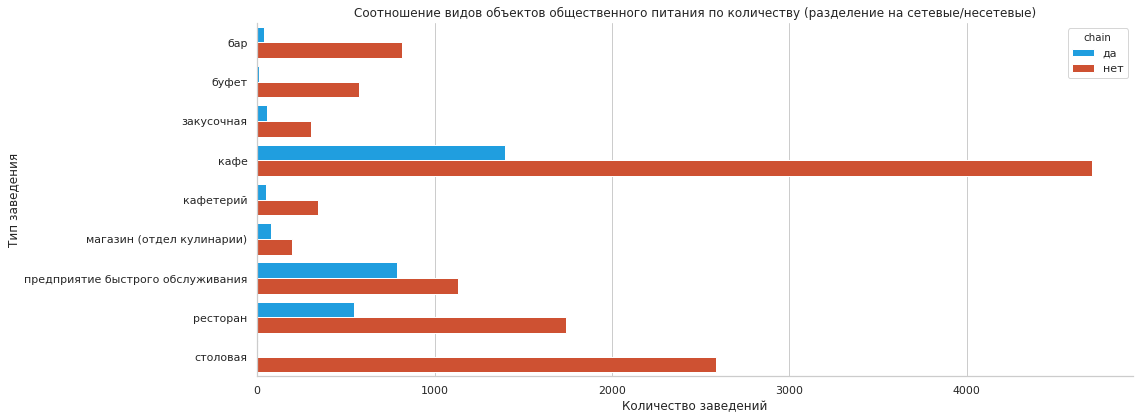

In [24]:
plt.figure(figsize=(16, 6))

ax = sns.barplot(x="count", y="object_type", hue = 'chain',  data=df1, palette=customPalette, orient = "h")
ax.set_title('Cоотношение видов объектов общественного питания по количеству (разделение на сетевые/несетевые)')
ax.set(xlabel='Количество заведений', ylabel='Тип заведения')

#задаем параметры текста подписей
sns.set_context("notebook", font_scale=1)

#убираем рамку, оставляя оси
sns.despine()
plt.tight_layout() #необходимо для того чтобы подписи не обрезались
#plt.savefig("figure12.png") # save as png
plt.show()

##### Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

Посмотрим распределение заведений по количеству мест.

In [25]:
df.head()

id             object_name chain object_type  \
0  151635                 сметана   нет        кафе   
1   77874                  родник   нет        кафе   
2   24309         кафе «академия»   нет        кафе   
3   21894              пиццетория    да        кафе   
4  119365  кафе «вишневая метель»   нет        кафе   

                                             address  number  
0         город москва, улица егора абакумова, дом 9      48  
1  город москва, улица талалихина, дом 2/1, корпус 1      35  
2          город москва, абельмановская улица, дом 6      95  
3            город москва, абрамцевская улица, дом 1      40  
4  город москва, абрамцевская улица, дом 9, корпус 1      50

In [26]:
df['number'].value_counts()

0      1621
40      835
20      727
30      685
10      644
       ... 
491       1
675       1
455       1
167       1
495       1
Name: number, Length: 315, dtype: int64

Видим 1621 строку с неуказанным количеством мест. Ноль в графе " количество посадочных мест" - может так-же означать заведения формата "to go" - киоски с кофе или шавермой.

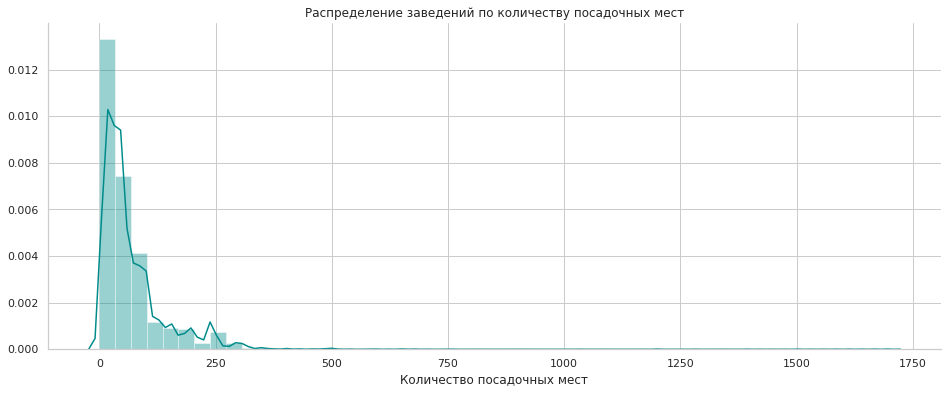

In [27]:
plt.figure(figsize=(16, 6))

ax = sns.distplot(df['number'], color = 'darkcyan')
ax.set_title('Распределение заведений по количеству посадочных мест')
ax.set(xlabel='Количество посадочных мест')

#задаем параметры текста подписей
sns.set_context("notebook", font_scale=1)

#убираем рамку, оставляя оси
sns.despine()
plt.show()

На графике заведений по количеству посадочных мест, видим длинный хвост и наличие заведений с количеством мест более 500, 1000 и даже 1500.  
Уберем "хвост" и выведем распределение для заведений с менее чем 300 посадочных мест.

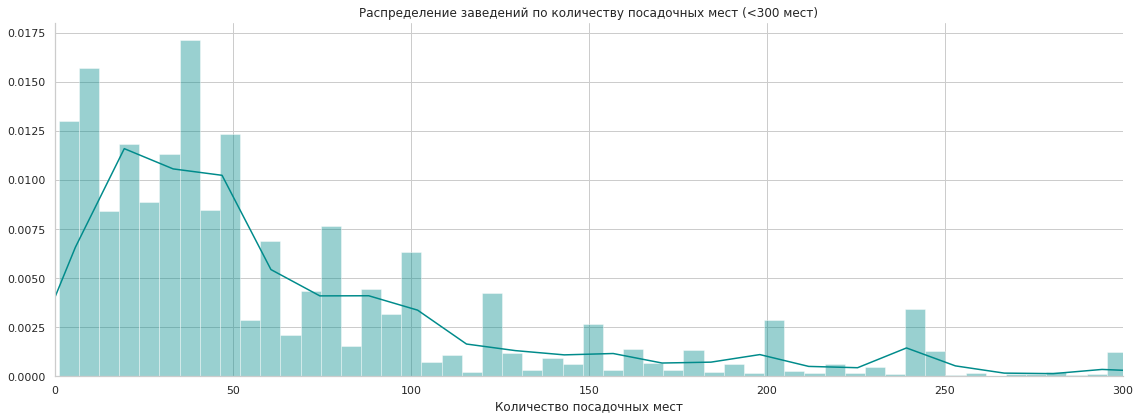

In [28]:
plt.figure(figsize=(16, 6))

ax = sns.distplot(df.query('number != 0')['number'], bins = 300, color = 'darkcyan')
ax.set_title('Распределение заведений по количеству посадочных мест (<300 мест)')
ax.set(xlabel='Количество посадочных мест', xlim=(0, 300))
#задаем параметры текста подписей
sns.set_context("notebook", font_scale=1)

#убираем рамку, оставляя оси
sns.despine()
plt.tight_layout() #необходимо для того чтобы подписи не обрезались
#plt.savefig("figure5.png") # save as png
plt.show()

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Дополнительные материалы по типам распределений: https://www.analyticsvidhya.com/blog/2017/09/6-probability-distributions-data-science/
</div>

<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ СТУДЕНТА:</b>
    
Благодарю! 

Выведем некоторые ключевые процентили распределения:

In [29]:
np.percentile(df.query('number != 0')['number'], [50,80, 85,90,95,99])

array([ 44. ,  98. , 120. , 160. , 229.8, 300. ])

Видим, что ограничив график по оси Х, отметкой 300 заведений - мы убрали всего  1% всех заведений.  

Стоит отметить - что здесь и далее выполнялся анализ без учета заведений формата "to go". Все строки с нулем в графе посадочные места, отброшены. Позволил себе так поступить, так как по заданию известно, что анализ производится для кафе в котором гостей обслуживает робот - следовательно, актуален анализ рынка именно заведений с наличием посадочных мест. К тому же не уверен, что предположение, о том что ноль посадочных мест может соответсвовать заведениям формата "to go", а не сбою в системе или отсутсвию данных верно.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Логичное предположение, но лучше заведения с нулевым числом посадочных мест оставить для анализа. Я думаю, что для кафе с роботами может быть актуально и "0" посадочных мест.
</div>

Выполним разделение на сетевые / несетевые заведения. Построим графики и выведем процентили.

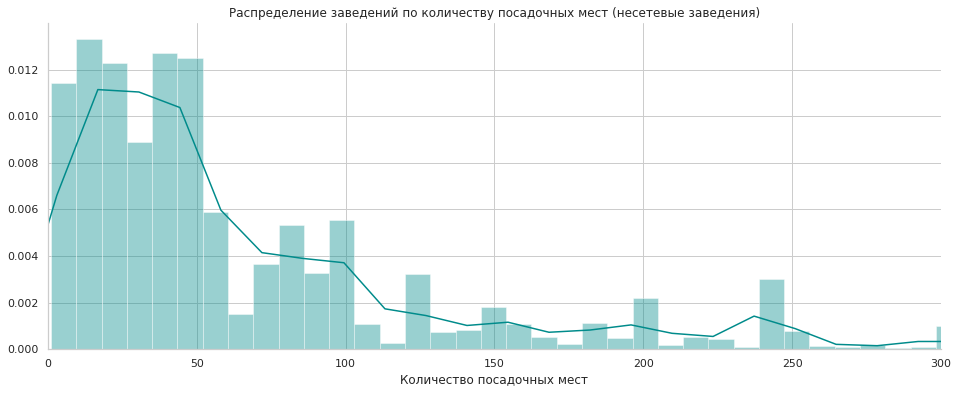

In [30]:
plt.figure(figsize=(16, 6))

ax = sns.distplot(df.query('number != 0 and chain == "нет"')['number'], bins = 200, color = 'darkcyan')
ax.set_title('Распределение заведений по количеству посадочных мест (несетевые заведения)')
ax.set(xlabel='Количество посадочных мест', xlim=(0, 300))
#задаем параметры текста подписей
sns.set_context("notebook", font_scale=1)

#убираем рамку, оставляя оси
sns.despine()
plt.show()

In [31]:
np.percentile(df.query('number != 0 and chain == "нет"')['number'], [50,80, 85,90,95,99])

array([ 44. , 100. , 120. , 172.6, 240. , 300. ])

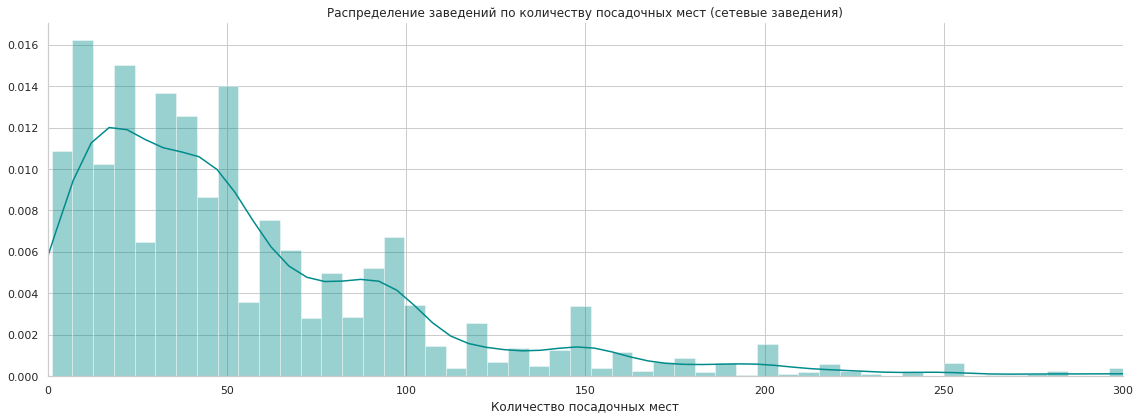

In [32]:
plt.figure(figsize=(16, 6))

ax = sns.distplot(df.query('number != 0 and chain == "да"')['number'], bins = 100, color = 'darkcyan')
ax.set_title('Распределение заведений по количеству посадочных мест (сетевые заведения)')
ax.set(xlabel='Количество посадочных мест', xlim=(0, 300))
#задаем параметры текста подписей
sns.set_context("notebook", font_scale=1)

#убираем рамку, оставляя оси
sns.despine()
plt.tight_layout() #необходимо для того чтобы подписи не обрезались
#plt.savefig("figure6.png") # save as png
plt.show()

In [33]:
np.percentile(df.query('number != 0 and chain == "да"')['number'], [50,85,90,95,99])

array([ 43.  ,  98.  , 122.1 , 160.  , 280.02])

Можно сделать вывод, что для сетевых заведений характерны:
- среднее число посадочных мест (по медиане) - 43 шт,
- 85% заведений с числом посадочных мест менее - 100 шт (15% сетевых заведений имеет более 100 посадочных мест. в то время как для несетевых заведений этот показатель - 20%)

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Молодец, что детально проанализировал графики :)
</div>

##### Для каждого вида объекта общественного питания опишим среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест?

In [34]:
df.head()

id             object_name chain object_type  \
0  151635                 сметана   нет        кафе   
1   77874                  родник   нет        кафе   
2   24309         кафе «академия»   нет        кафе   
3   21894              пиццетория    да        кафе   
4  119365  кафе «вишневая метель»   нет        кафе   

                                             address  number  
0         город москва, улица егора абакумова, дом 9      48  
1  город москва, улица талалихина, дом 2/1, корпус 1      35  
2          город москва, абельмановская улица, дом 6      95  
3            город москва, абрамцевская улица, дом 1      40  
4  город москва, абрамцевская улица, дом 9, корпус 1      50

Сгруппируем объекты по типу и получим таблицу со средним количеством посадочных мест:

In [35]:
df1 = df[['object_type','number']].groupby('object_type').agg('mean').reset_index().sort_values(by = 'number', ascending = False)
df1

object_type      number
8                           столовая  130.246618
7                           ресторан   96.834136
1                              буфет   51.129915
0                                бар   43.494159
3                               кафе   39.716019
6  предприятие быстрого обслуживания   20.552262
4                          кафетерий    9.123116
2                         закусочная    7.608333
5          магазин (отдел кулинарии)    5.589744

На первом месте по количеству мест находятся столовые, расчитанные на массовость. Далее рестораны с их нацеленностью на банкеты и буффеты.

Построим графики типа `violinplot`:

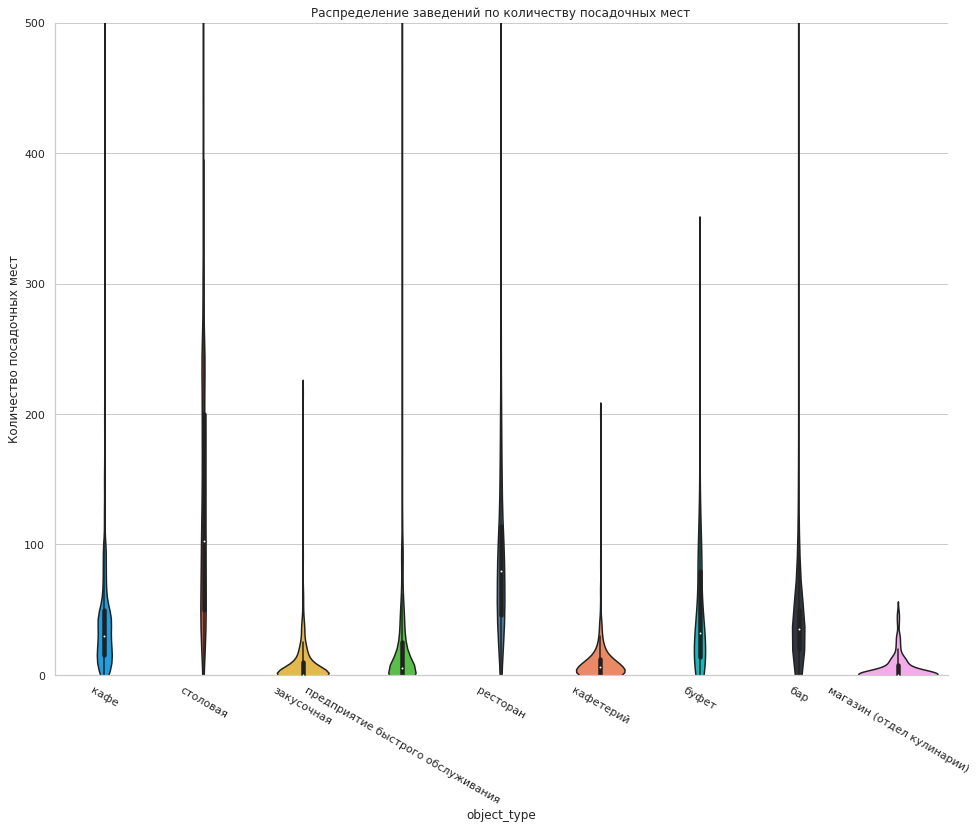

In [36]:
plt.figure(figsize=(16, 12))

ax = sns.violinplot(x="object_type", y="number", data=df, palette=customPalette)

ax.set_title('Распределение заведений по количеству посадочных мест')
ax.set(ylabel='Количество посадочных мест', ylim=(0, 500))
#задаем параметры текста подписей
sns.set_context("notebook", font_scale=1)
#поворот подписей по оси Х
ax.set_xticklabels(ax.get_xticklabels(),rotation=-30)
#убираем рамку, оставляя оси
sns.despine()
plt.show()


Вывод графиков выше, в данном случае не очень информативен. Очень длинные хвосты, много выбросов у распределений и графики плохочитаемые.

Однако по очертаниям, можем увидеть, что есть два типа распределений количества заведений на графиках: с широкими основаниями  - большим количеством заведений с небольшим количеством мест (например, закусочные, кафетерии, отделы кулинарии) и более равномерные распределения (бары, буфеты, кафе, рестораны, столовые)

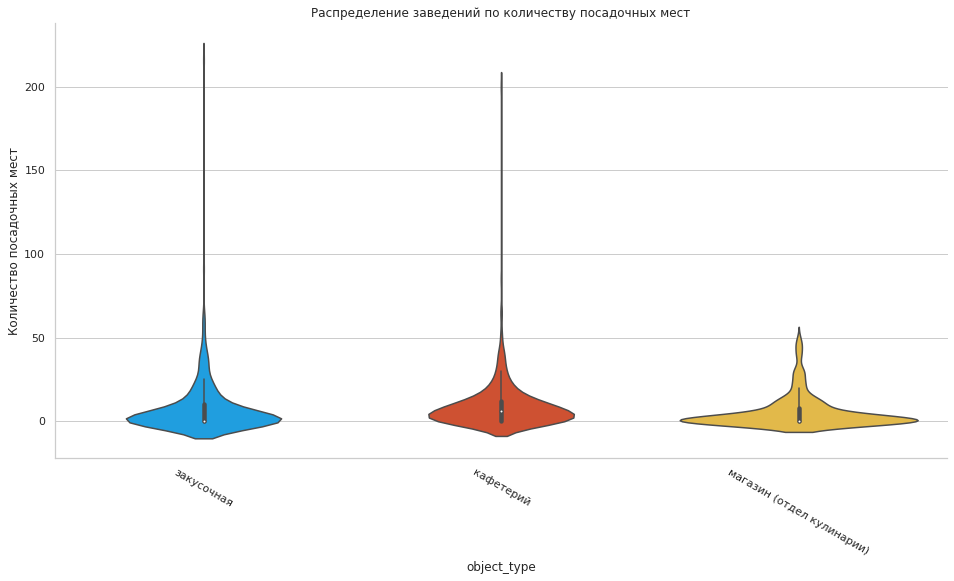

In [37]:
plt.figure(figsize=(16, 8))

ax = sns.violinplot(x="object_type", y="number", data=df.query('object_type == ["закусочная","кафетерий","магазин (отдел кулинарии)"]'), palette=customPalette)

ax.set_title('Распределение заведений по количеству посадочных мест')
ax.set(ylabel='Количество посадочных мест')
#задаем параметры текста подписей
sns.set_context("notebook", font_scale=1)
#поворот подписей по оси Х
ax.set_xticklabels(ax.get_xticklabels(),rotation=-30)
#убираем рамку, оставляя оси
sns.despine()
plt.show()

Построим графики типа `boxplot`

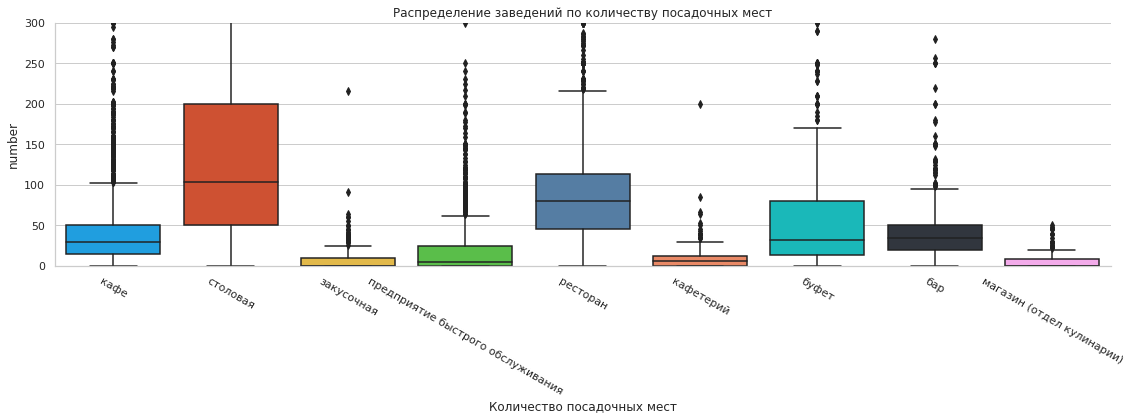

In [38]:
plt.figure(figsize=(16, 6))

ax = sns.boxplot(x="object_type", y="number", data=df, palette=customPalette)

ax.set_title('Распределение заведений по количеству посадочных мест')
ax.set(xlabel='Количество посадочных мест', ylim=(0, 300))
#задаем параметры текста подписей
sns.set_context("notebook", font_scale=1)
#поворот подписей по оси Х
ax.set_xticklabels(ax.get_xticklabels(),rotation=-30)
#убираем рамку, оставляя оси
sns.despine()
plt.tight_layout() #необходимо для того чтобы подписи не обрезались
#plt.savefig("figure7.png") # save as png
plt.show()

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Дополнительные материалы по анализу выбросов: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba 
</div>

Добавим к нашему списку по среднему количеству мест, строку с медианой:

In [39]:
df2 = df[['object_type','number']].groupby('object_type').agg({'mean','median'}).reset_index()
df2.columns = ['object_type', 'median', 'mean']
df2["mean"] = df2["mean"].round(1)
df2.sort_values(by = 'median', ascending = False)

object_type  median   mean
8                           столовая     103  130.2
7                           ресторан      80   96.8
0                                бар      35   43.5
1                              буфет      32   51.1
3                               кафе      30   39.7
4                          кафетерий       6    9.1
6  предприятие быстрого обслуживания       5   20.6
2                         закусочная       0    7.6
5          магазин (отдел кулинарии)       0    5.6

Как и по среднему арифместическому количеству мест, так и по медиане - в числе первых мест столовые и рестораны, далее идут буфеты и бары. Как мы видим из "ящиков с усами" и из сравнения среднего и медианы: сильно смещенные распределения (разница между ) у буфетов и предприятий быстрого обслуживания. Думаю для фастфудов это характерно из-за наличия нулей в графе посадочные месте, у фаст-фудов расположенных на фуд-кортах в торговых центрах, где все места общие. 

In [40]:
df.query('object_type == "предприятие быстрого обслуживания" and number == 0')['object_name'].value_counts()

шаурма                        131
донер кебаб                    25
милти                          19
кофе с собой                   19
пекарня                        18
                             ... 
блинок                          1
три правила                     1
шаурма-чебуреки                 1
шаурма,выпечка, куры-гриль      1
fresh bar                       1
Name: object_name, Length: 326, dtype: int64

Вывел самые популярные названия объектов из категории "предприятие быстрого обслуживания" с нулями в графе посадочные мест. Из 317 таких объектов, почти половина - "шаурмечные". Таким образов предположение по поводу фудкортов - не подтвердилось.

In [41]:
df.query('object_type == "ресторан"')['object_name'].value_counts().head()

чайхона №1    37
kfc           30
тануки        29
макдоналдс    27
якитория      25
Name: object_name, dtype: int64

In [42]:
df.query('object_type == "ресторан" and number == 0')['object_name'].value_counts().head()

макдоналдс         5
бургер кинг        4
kfc                3
крошка картошка    2
гришаев в.в        2
Name: object_name, dtype: int64

Бургер кинг, макдональдс, kfc - в другой категории  - "рестораны". Как ни странно всего 3-4 заведения таких заведения которые имеют ноль в графе посадочные места.

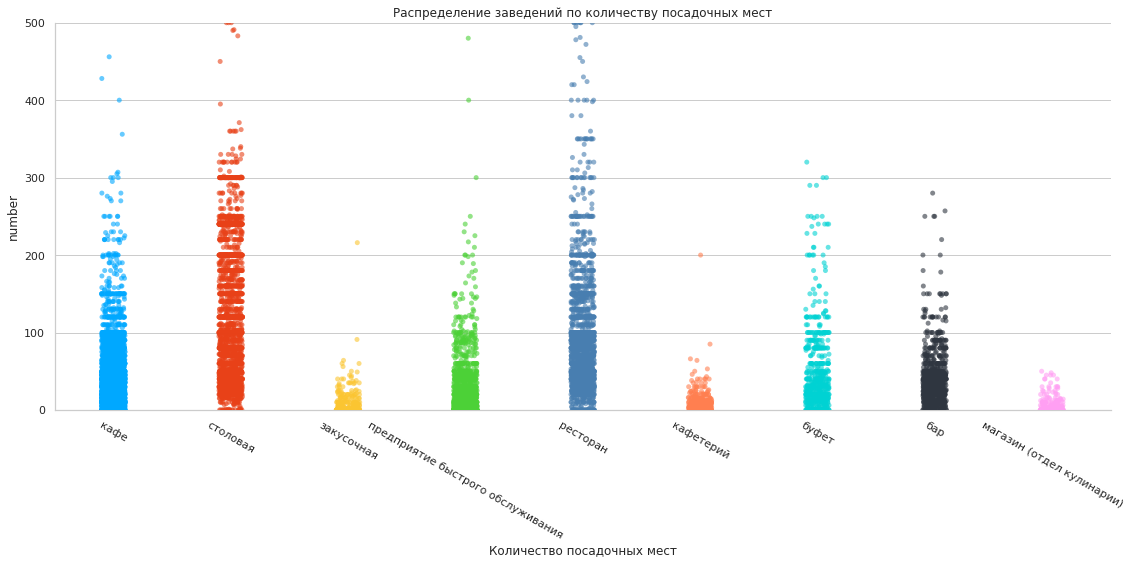

In [43]:
plt.figure(figsize=(16, 8))

ax = sns.stripplot(x="object_type", y="number", data=df, palette=customPalette, alpha = 0.6)

ax.set_title('Распределение заведений по количеству посадочных мест')
ax.set(xlabel='Количество посадочных мест', ylim=(0, 500))
#задаем параметры текста подписей
sns.set_context("notebook", font_scale=1)
#поворот подписей по оси Х
ax.set_xticklabels(ax.get_xticklabels(),rotation=-30)
#убираем рамку, оставляя оси
sns.despine()
plt.tight_layout() #необходимо для того чтобы подписи не обрезались
#plt.savefig("figure8.png") # save as png
plt.show()

На графике типа 'stripplot' видно что распределения количества посадочных мест для закусочных, баров, кафе и некоторых других типов заведений - более кучные. Значения сконцентрированы в определенном промежутке, в то время как для ресторанов и столовых распределение более рассеяно,  больше выбросов и больше интервалы значений. Есть ресторан на 1500 мест и столовая на 1400 посетителей. Максимальное же значение в датасете - заведение с 1700 посадочных мест, формально в датасете указана категория "бар", но по факту это площадка для концертов, так что лидерство по посадочным местам занимает "банкетный зал Шелк".

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Отличный анализ :)
</div>

##### Выделим в отдельный столбец информацию об улице из столбца `address` <a id="pars"></a>

Пожалуй самая сложная, но от этого не менее интересная часть этого проекта - распарсить улицу из строки адреса.
Сразу предупреждаю, мой код ниже - наверное не идеален. Особенно с точки зрения ресурсозатратности. Пытался что-то поменять в нем, но не вышло другого рабочего вариант решения. 


Буду очень благодарен, если укажешь на основные существенные недочеты, а так-же грубые ошибки при наличии.

  
Для начала разделяем строку из столбца `address` запятыми на несколько частей.

In [44]:
#разделим строку с адресом на отдельные части запятой
df['split_address'] = df['address'].str.split(', ')
df.head(6)

id               object_name chain object_type  \
0  151635                   сметана   нет        кафе   
1   77874                    родник   нет        кафе   
2   24309           кафе «академия»   нет        кафе   
3   21894                пиццетория    да        кафе   
4  119365    кафе «вишневая метель»   нет        кафе   
5   27429  стол. при гоу сош № 1051   нет    столовая   

                                             address  number  \
0         город москва, улица егора абакумова, дом 9      48   
1  город москва, улица талалихина, дом 2/1, корпус 1      35   
2          город москва, абельмановская улица, дом 6      95   
3            город москва, абрамцевская улица, дом 1      40   
4  город москва, абрамцевская улица, дом 9, корпус 1      50   
5  город москва, абрамцевская улица, дом 15, корп...     240   

                                       split_address  
0       [город москва, улица егора абакумова, дом 9]  
1  [город москва, улица талалихина, дом 2/1, корп...  
2        [город москва, абельмановская улица, дом 6]  
3          [город москва, абрамцевская улица, дом 1]  
4  [город москва, абрамцевская улица, дом 9, корп...  
5  [город москва, абрамцевская улица, дом 15, кор...

Получили в каждой ячейке столбца - `split_address` отдельный список.

Далее путем многих проб и ошибок, я дошёл до такого рабочего варианта.  
Немного объяснений:
1. В ячейках-списках столбца `split_address` - разное количество элементов. Чаще всего на втором месте - идет название улицы. Однако в некоторых ячейках - на втором месте стоит название района или поселка. Считаю было бы некоректным группировать по ним, т.к. в задании - указано "информацию об улице". 
2. В списке `patterns` - почти все возможные варианты наименований линейных транспортных объектов города Москвы, взятый с [этого источника](https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D1%83%D0%BB%D0%B8%D1%86_%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D1%8B). Следовательно принимаем допущение - других наименований линейных транспортных объектов в датасете нет или их количество не влияет на результаты анализа для учебного проекта.

In [45]:
df['street'] = 0
df.head()

id             object_name chain object_type  \
0  151635                 сметана   нет        кафе   
1   77874                  родник   нет        кафе   
2   24309         кафе «академия»   нет        кафе   
3   21894              пиццетория    да        кафе   
4  119365  кафе «вишневая метель»   нет        кафе   

                                             address  number  \
0         город москва, улица егора абакумова, дом 9      48   
1  город москва, улица талалихина, дом 2/1, корпус 1      35   
2          город москва, абельмановская улица, дом 6      95   
3            город москва, абрамцевская улица, дом 1      40   
4  город москва, абрамцевская улица, дом 9, корпус 1      50   

                                       split_address  street  
0       [город москва, улица егора абакумова, дом 9]       0  
1  [город москва, улица талалихина, дом 2/1, корп...       0  
2        [город москва, абельмановская улица, дом 6]       0  
3          [город москва, абрамцевская улица, дом 1]       0  
4  [город москва, абрамцевская улица, дом 9, корп...       0

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Кстати, можно убрать вывод warnings добавив следующий код:
</div>

In [46]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

In [47]:
#вручную записываю список всех наименований линейных транспортных объектов г. Москвы
patterns = ['улица', 'переулок','проезд', 'площадь', 'набережная', 'шоссе', 'тупик', 'бульвар', 'аллея', 'проспект', 'просекa', 'линия', 'километр московской кольцевой']
#далее для каждого из этих шаблонов
for pattern in patterns:
#проходимся по всем элементам столбца "split_address"
    for i in range(len(df['split_address'])):
#по каждому из элементов ячеек и ищем соответсвие шаблона и ключа в ячейке, и далее записываем в новый столбец - новое значение       
                for m in df['split_address'][i]:
                    if re.search(pattern, m):
                        df['street'][i] = m

Подразумеваю, используя регулярные выражения, я бы сделал все куда более изящно и менее ресурсоемко. Я правда пытался. Долго. Но результат остался нулевым.

Проверяем на случайных строках правильность работы функции:

In [48]:
df[['street', 'address']].sample(9)

street                                            address
1880                     0  город москва, поселение щаповское, деревня ове...
8047    воронцовская улица           город москва, воронцовская улица, дом 50
775     новодевичий проезд            город москва, новодевичий проезд, дом 4
11984  нижегородская улица         город москва, нижегородская улица, дом 27б
10206   борисовский проезд     город москва, борисовский проезд, владение 46а
5870       совхозная улица              город москва, совхозная улица, дом 2а
1709     профсоюзная улица  город москва, профсоюзная улица, дом 25, корпус 1
2038     зубовский бульвар  город москва, зубовский бульвар, дом 13, строе...
9464       пятницкое шоссе              город москва, пятницкое шоссе, дом 21

In [49]:
df['street'].value_counts()

0                         362
проспект мира             204
профсоюзная улица         183
ленинградский проспект    173
пресненская набережная    167
                         ... 
композиторская улица        1
хитровский переулок         1
мамоновский переулок        1
кондрашёвский тупик         1
песчаный переулок           1
Name: street, Length: 1920, dtype: int64

В столбце `street` осталось почти четыре сотни "нулей". Это значит, что для них не подошел ни один из шаблонов.  
Выведем их на экран:

In [50]:
df.query('street == 0').sample(9)

id                                        object_name chain  \
7237    20103                                          амстердам   нет   
7231    84015                                  кафетерий, тандыр   нет   
12495  198412                                            выпечка   нет   
10872  174064                                          хинкалико   нет   
1612   158133                                  ресторан «тануки»    да   
10542  188447                          кафе «кулинария здоровья»   нет   
4846    29464  столовая в школе 1151 корп.1464 (ранее школа 1...   нет   
12813  194975                                 кафе «джиджигриль»   нет   
14058  205702        предприятие быстрого обслуживания «кофепит»   нет   

                             object_type  \
7237                                кафе   
7231                           кафетерий   
12495                         закусочная   
10872                               кафе   
1612                            ресторан   
10542                               кафе   
4846                            столовая   
12813                               кафе   
14058  предприятие быстрого обслуживания   

                                                 address  number  \
7237          город москва, город зеленоград, корпус 159      75   
7231         город москва, город зеленоград, корпус 1637       6   
12495  город москва, поселение сосенское, деревня сос...       0   
10872        город москва, город зеленоград, корпус 1543      35   
1612         город москва, город зеленоград, корпус 1805     156   
10542        город москва, город зеленоград, корпус 1519       8   
4846         город москва, город зеленоград, корпус 1464     180   
12813            город москва, 1-й лучевой просек, дом 1      50   
14058  город москва, микрорайон северное чертаново, к...       0   

                                           split_address street  
7237        [город москва, город зеленоград, корпус 159]      0  
7231       [город москва, город зеленоград, корпус 1637]      0  
12495  [город москва, поселение сосенское, деревня со...      0  
10872      [город москва, город зеленоград, корпус 1543]      0  
1612       [город москва, город зеленоград, корпус 1805]      0  
10542      [город москва, город зеленоград, корпус 1519]      0  
4846       [город москва, город зеленоград, корпус 1464]      0  
12813          [город москва, 1-й лучевой просек, дом 1]      0  
14058  [город москва, микрорайон северное чертаново, ...      0

Видим что это скорее всего адреса за пределами Москвы (возможно де-юре в ее границах). 
В них нет информации по улице. Вероятно это территории СНТ или военных городков.
Однако я принял решение пожертвовать ими, так как улицы в этих адресах нет. А группировка по названиям поселков можеи исказить результаты.

In [51]:
df = df.query('street != 0')
print('В нашем датасете осталось', df.shape[0], 'заведений')

В нашем датасете осталось 15004 заведений


In [52]:
df.head()

id             object_name chain object_type  \
0  151635                 сметана   нет        кафе   
1   77874                  родник   нет        кафе   
2   24309         кафе «академия»   нет        кафе   
3   21894              пиццетория    да        кафе   
4  119365  кафе «вишневая метель»   нет        кафе   

                                             address  number  \
0         город москва, улица егора абакумова, дом 9      48   
1  город москва, улица талалихина, дом 2/1, корпус 1      35   
2          город москва, абельмановская улица, дом 6      95   
3            город москва, абрамцевская улица, дом 1      40   
4  город москва, абрамцевская улица, дом 9, корпус 1      50   

                                       split_address                 street  
0       [город москва, улица егора абакумова, дом 9]  улица егора абакумова  
1  [город москва, улица талалихина, дом 2/1, корп...       улица талалихина  
2        [город москва, абельмановская улица, дом 6]   абельмановская улица  
3          [город москва, абрамцевская улица, дом 1]     абрамцевская улица  
4  [город москва, абрамцевская улица, дом 9, корп...     абрамцевская улица

Запишем Топ-10 улиц по количеству заведений: <a id="top10"></a>

In [53]:
top10_streets = df['street'].value_counts().head(10).reset_index()
top10_streets.columns = ['street','count']
top10_streets

street  count
0           проспект мира    204
1       профсоюзная улица    183
2  ленинградский проспект    173
3  пресненская набережная    167
4        варшавское шоссе    165
5      ленинский проспект    148
6    проспект вернадского    132
7    кутузовский проспект    114
8         каширское шоссе    112
9    кировоградская улица    110

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Улицы с наибольшим числом заведений выделены верно.
</div>

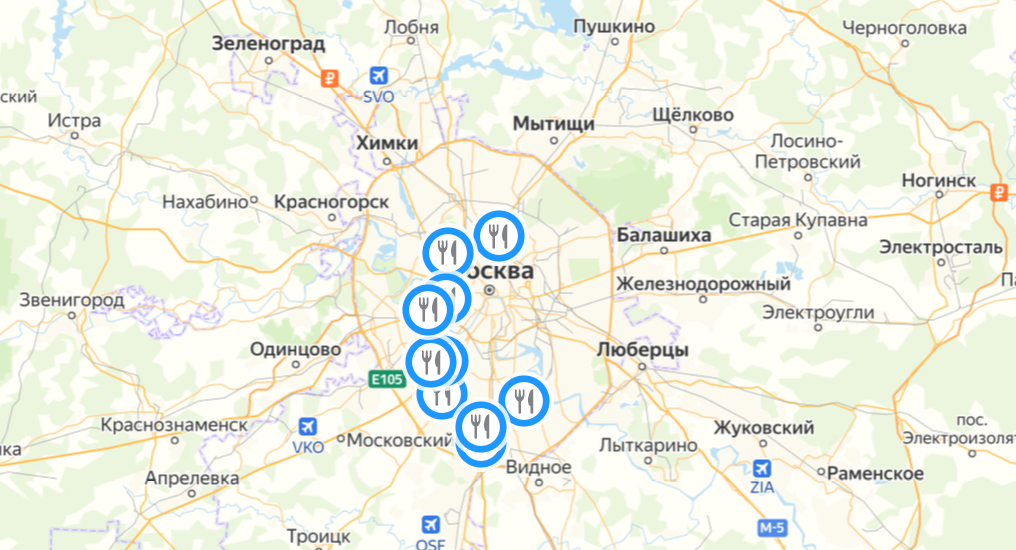

Нанес на карту примерное расположение таких улиц (к сожаления не удалось быстро найти сервис, где бы смог выделить сразу несколько улиц встроенными инструментами, а обводить линии в фотошопе не хотелось). 
Видим что такие улицы сконцентрированы в западной части столицы, при этом чуть больше улиц на севере, северо-востоке и они находятся на отдалении от центра. Можно сказать на выездах из города.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Превосходный анализ расположения улиц :)
</div>

Изначально мое предположение заключалось в том, что наличие на выезде из города крупного торгового центра, может увеличить количество заведений сразу на 30-40, так как в больших торговых центрах помимо фуд-корта с множеством фаст-фуд-корнеров, еще и многочисленные островки с кофе, холодными чаями и т.д.

Проверим это предположение:

In [54]:
top10 = top10_streets['street']

In [55]:
df.query('street in @top10')['chain'].value_counts(1)

нет    0.743369
да     0.256631
Name: chain, dtype: float64

In [56]:
df1 = df.query('street in @top10')['chain'].value_counts().reset_index()
df1

index  chain
0   нет   1121
1    да    387

In [57]:
plt.figure(figsize=(10, 10))
fig = go.Figure(data=[go.Pie(labels=df1['index'], values=df1['chain'], hole=.3)])
fig.update_traces(hoverinfo='label+value+percent', textinfo='value+percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.30
))
fig.update_layout(
    title={
        'text': "Отношение сетевых и несетвых заведений на топ-10 популярных улицах",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
#plt.savefig("figure9.png") # save as png
fig.show()

<Figure size 720x720 with 0 Axes>

Построив аналогично исходному датасету, "пирог" распределения сетевых/несетвых заведений видим, что доля сетевых заведений увеличилась всего на 6% относительно первоначального распределения.
Посмотрим какие типы заведений доминируют на топ-10 улиц Москвы:

In [58]:
df1 = df.query('street in @top10')['object_type'].value_counts().reset_index()
df1['percent'] = (df1['object_type'] / sum(df1['object_type'])).round(2)
df1.columns = ['object_type', 'count', 'percent']
df1

object_type  count  percent
0                               кафе    635     0.42
1                           ресторан    291     0.19
2  предприятие быстрого обслуживания    258     0.17
3                           столовая    139     0.09
4                                бар     63     0.04
5                          кафетерий     48     0.03
6                              буфет     33     0.02
7          магазин (отдел кулинарии)     24     0.02
8                         закусочная     17     0.01

Согласно моему предположению доля предприятий быстрого питания выросла, но так-же не очень существенно (всего на 4%). Доля столовых уменьшилась (на 6%), вероятно благодаря тому, что отсеились почти все столовые нацеленные на туристов в центральной части города, так же вряд-ли вдоль таких магистралей осталось много производств со своими столовыми. Количество баров также уменьшилось. Можем посчитать, что из 5948 кафе - 635 заведений расположились на 10 "густонаселенных" улицах, это более 10% заведений "кафе" всего города.

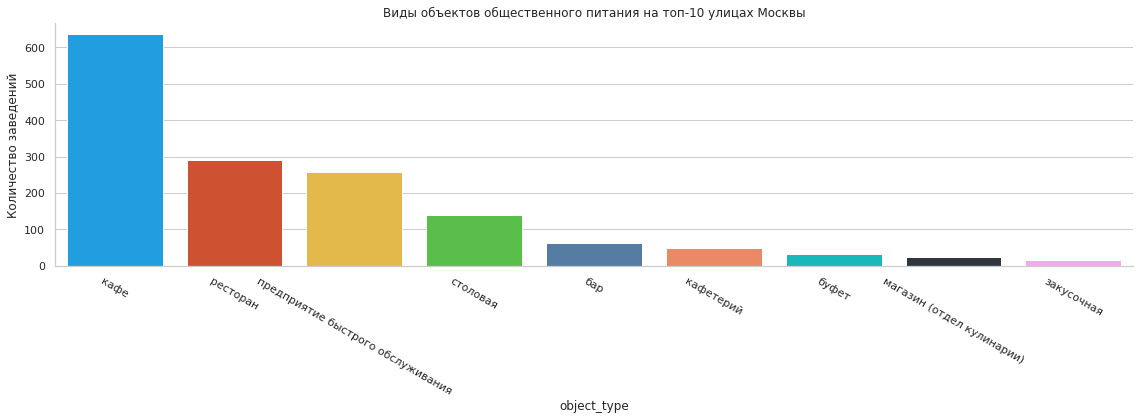

In [59]:
plt.figure(figsize=(16, 6))

ax = sns.barplot(data = df1, x="object_type", y="count", palette=customPalette)

ax.set_title('Виды объектов общественного питания на топ-10 улицах Москвы')
ax.set(ylabel='Количество заведений')

#поворот подписей по оси Х
ax.set_xticklabels(ax.get_xticklabels(),rotation=-30)

#задаем параметры текста подписей
sns.set_context("notebook", font_scale=1)

#убираем рамку, оставляя оси
sns.despine()
plt.tight_layout() #необходимо для того чтобы подписи не обрезались
#plt.savefig("figure10.png") # save as png
plt.show()

Среди топ-10 улиц Москвы на которых суммарно находятся 1508 заведений, чуть менее половины - "кафе" (635 заведений), следом идут рестораны (291 заведение) и предприятия быстрого обслуживания (258 заведений). 

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Ок, улицы с наибольшим числом заведений проанализированы.
</div>

##### Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы? <a id="only1"></a>

Найдем список этх улиц с одним объектом общественного питания. 

In [60]:
top_streets = df['street'].value_counts().reset_index()
top_streets.columns = ['street','count']
streets  = top_streets.query("count == 1").reset_index()
streets

index                          street  count
0     1358               7-я улица лазенки      1
1     1359              переулок васнецова      1
2     1360  улица рассудовское лесничество      1
3     1361             соймоновский проезд      1
4     1362                нагорный бульвар      1
..     ...                             ...    ...
556   1914            композиторская улица      1
557   1915             хитровский переулок      1
558   1916            мамоновский переулок      1
559   1917             кондрашёвский тупик      1
560   1918                     тихая улица      1

[561 rows x 3 columns]

Получилось целых 549 строк. Вручную долго делать анализ районов, нанося все улицы на карту.


Поэтому я решил поискать информацию (готовый дата-сет улица-район в интернет). Казалось бы задача не очень сложная. Но так как качать архив КЛАДРа на несколько Гб и затем грузить его в проект мне не захотелось. На сайте открытых данных мэрии Москвы нашел дата-сет постановки зданий на учет, в котором как раз были необходимые мне столбцы "название улицы" и "муниципальный округ" (количество строк порядка (2000000) было достаточно, чтобы охватить большинство улиц столицы). Скачал эксельку, вручную удалил в экселе ненужные мне столбцы и сохранил на гугл-диск (удаление столбцов выполнил сразу в экселе, чтобы уменьшить вес файла, на этапе загрузки в диск и затем импорта в jupiter).
Далее загружаем ее сюда и группируем улицы по районам (т.к. одной улице не соответсвует только одна строка таблицы).

In [61]:
from io import BytesIO
import requests
file_name = 'https://docs.google.com/spreadsheets/d/1Khr7Va6xOI3eexqihY8DEGWl6D9-Qepdfv2xB1HoLCQ/export?format=csv'
r = requests.get(file_name)
area = pd.read_csv(BytesIO(r.content))
#area = pd.read_excel(r'C:\datasets\moscow\data.xls', index_col=None)  
area.head()

area                  street
0  муниципальный округ Чертаново Южное        Варшавское шоссе
1          муниципальный округ Вешняки         Косинская улица
2        муниципальный округ Басманный    Гороховский переулок
3     муниципальный округ Метрогородок        Тагильская улица
4            муниципальный округ Сокол  Ленинградский проспект

In [62]:
df2 = area.groupby(['street','area']).sum().reset_index()
df2['street'] = df2['street'].str.lower()
df2

street                                area
0        1-й автозаводский проезд     муниципальный округ Даниловский
1         1-й амбулаторный проезд        муниципальный округ Аэропорт
2     1-й бабьегородский переулок        муниципальный округ Якиманка
3         1-й балтийский переулок        муниципальный округ Аэропорт
4          1-й басманный переулок       муниципальный округ Басманный
...                           ...                                 ...
3334            шоссе энтузиастов      муниципальный округ Ивановское
3335            шоссе энтузиастов       муниципальный округ Измайлово
3336            шоссе энтузиастов       муниципальный округ Лефортово
3337            шоссе энтузиастов          муниципальный округ Перово
3338            шоссе энтузиастов  муниципальный округ Соколиная Гора

[3339 rows x 2 columns]

Соединяем наши два датасета по столбцу `street`:

In [63]:
streets = streets.merge(df2, on='street')
streets.head()

index               street  count                                  area
0   1358    7-я улица лазенки      1  муниципальный округ Ново-Переделкино
1   1359   переулок васнецова      1         муниципальный округ Мещанский
2   1361  соймоновский проезд      1         муниципальный округ Хамовники
3   1362     нагорный бульвар      1          муниципальный округ Котловка
4   1363   калибровская улица      1      муниципальный округ Останкинский

Удаляем ненужные столбцы и на выходе получается дата сете с улицами на которых только 1 заведение общепита и соответсвующей ей район.

In [64]:
streets = streets.drop(columns=['index','count'], axis=1)
streets

street                                  area
0             7-я улица лазенки  муниципальный округ Ново-Переделкино
1            переулок васнецова         муниципальный округ Мещанский
2           соймоновский проезд         муниципальный округ Хамовники
3              нагорный бульвар          муниципальный округ Котловка
4            калибровская улица      муниципальный округ Останкинский
..                          ...                                   ...
539  2-й новокузнецкий переулок     муниципальный округ Замоскворечье
540           делегатская улица          муниципальный округ Тверской
541        композиторская улица             муниципальный округ Арбат
542         хитровский переулок         муниципальный округ Басманный
543        мамоновский переулок          муниципальный округ Тверской

[544 rows x 2 columns]

<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ СТУДЕНТА:</b>
Сейчас понял, что если улица находится в двух-районах она выводится более 1 раза, однако убрав их существенно картина не меняется.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Да, верное замечание, но как Ты правильно отметил этим можно пренебречь :)
</div>

In [65]:
streets_new = streets['street'].value_counts().reset_index()
streets_new

index  street
0       11-я парковая улица       3
1            нарвская улица       3
2         площадь журавлёва       2
3         причальный проезд       2
4        улица достоевского       2
..                      ...     ...
501   2-я улица энтузиастов       1
502        миусская площадь       1
503      егорьевский проезд       1
504    2-й иртышский проезд       1
505  1-й кожуховский проезд       1

[506 rows x 2 columns]

In [66]:
streets_new = streets_new[streets_new['street'] == 1].reset_index(drop = True)
streets_new.columns = ['index', 'count']
streets_new

index  count
0           улица максимова      1
1             улица кубинка      1
2               улица дубки      1
3          пионерская улица      1
4        оренбургская улица      1
..                      ...    ...
465   2-я улица энтузиастов      1
466        миусская площадь      1
467      егорьевский проезд      1
468    2-й иртышский проезд      1
469  1-й кожуховский проезд      1

[470 rows x 2 columns]

In [67]:
streets_new = pd.merge(streets_new, streets, how = 'inner', left_on = 'index', right_on = 'street')
streets_new.drop(columns=['count','street'], axis=1)
streets_new

index  count                  street  \
0           улица максимова      1         улица максимова   
1             улица кубинка      1           улица кубинка   
2               улица дубки      1             улица дубки   
3          пионерская улица      1        пионерская улица   
4        оренбургская улица      1      оренбургская улица   
..                      ...    ...                     ...   
465   2-я улица энтузиастов      1   2-я улица энтузиастов   
466        миусская площадь      1        миусская площадь   
467      егорьевский проезд      1      егорьевский проезд   
468    2-й иртышский проезд      1    2-й иртышский проезд   
469  1-й кожуховский проезд      1  1-й кожуховский проезд   

                                     area  
0              муниципальный округ Щукино  
1           муниципальный округ Можайский  
2       муниципальный округ Тимирязевский  
3             муниципальный округ Внуково  
4    муниципальный округ Косино-Ухтомский  
..                                    ...  
465            муниципальный округ Перово  
466          муниципальный округ Тверской  
467           муниципальный округ Люблино  
468         муниципальный округ Гольяново  
469       муниципальный округ Даниловский  

[470 rows x 4 columns]

Выведем топ-10 округов по количеству таких улиц:

In [68]:
streets['area'].value_counts().head(10).reset_index()

index  area
0      муниципальный округ Хамовники    26
1      муниципальный округ Таганский    23
2      муниципальный округ Басманный    23
3       муниципальный округ Тверской    20
4    муниципальный округ Пресненский    19
5   муниципальный округ Марьина Роща    18
6          муниципальный округ Арбат    15
7  муниципальный округ Замоскворечье    13
8      муниципальный округ Мещанский    13
9     муниципальный округ Сокольники    11

In [69]:
streets_new['area'].value_counts().head(10).reset_index()

index  area
0       муниципальный округ Хамовники    23
1       муниципальный округ Таганский    22
2       муниципальный округ Басманный    21
3        муниципальный округ Тверской    19
4     муниципальный округ Пресненский    16
5    муниципальный округ Марьина Роща    16
6       муниципальный округ Мещанский    11
7      муниципальный округ Сокольники    11
8   муниципальный округ Замоскворечье    11
9  муниципальный округ Соколиная Гора    10

Получаем топ районов (муниципальных округов) по количеству улиц с 1 заведением.

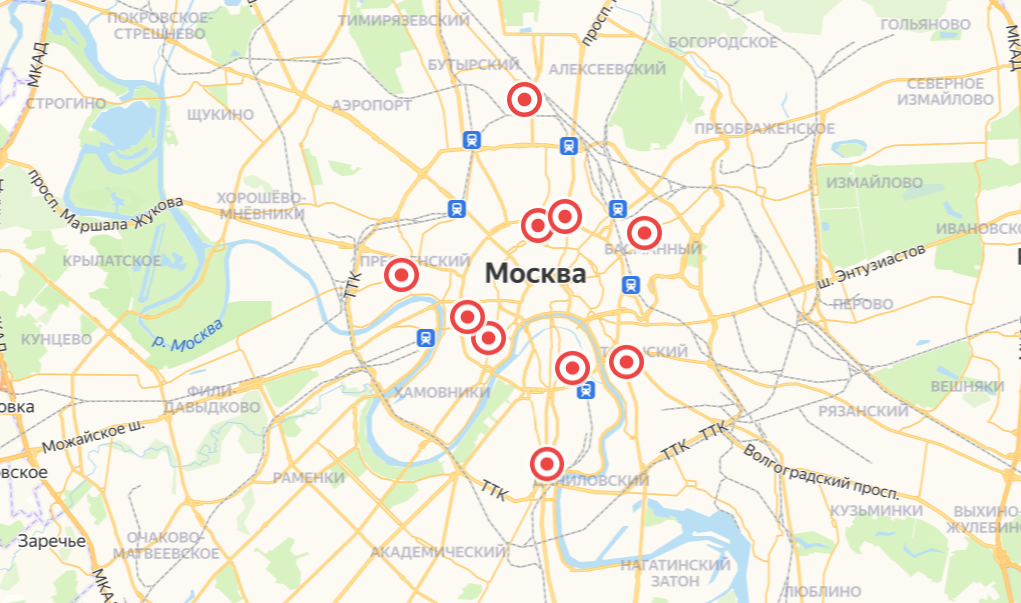

На карте не получилось быстро отметить границы районов, поэтому нанес метками адреса Администраций и Управ муниципальных округов. 9 из 10 отметок получились внутри третьего транспортного и 4,5 из 10 меток (одна метка буквально на границе) попали внутрь Садового кольца, а это самый центр столицы. Это наверное самая очевидная закономерность среди районов, которую я - не житель столицы могу сразу наблюдать. В целом топ 10 таких самых популярных районов довольно хаотично разбросаны по Москве.

<div class="alert alert-block alert-warning">
Комментарий ревьюера v. 1:
    
Подумай, пожалуйста, с чем связано наличие только одного заведения на улице?
</div>

<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ СТУДЕНТА:</b>  
    
У меня есть несколько предположений, но вряд-ли из них есть одно-единственное правильное:
1. Вероятно эти улицы или переулки очень короткие. Такое в том числе справедливо для "площади". Судя по всему скорее всего так и есть для большинства улиц (погуглил несколько улиц из списка) 
2. Район расположения может влиять, например может быть 1 заведение где-нибудь в промышленных районах (и скорее всего такое заведение - столовая или что-то наподобие

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Да, Ты верно предположил, что наличие только одного заведения на улицу связано с её длиной. Кстати, если Тебе интересно, то вот ссылка на самые короткие улицы в мире: https://www.smithsonianmag.com/travel/top-ten-small-streets-worth-visiting-180954589/
    
Кроме того, проходимость района в котором распологается улица тоже может оказывать влияние.
</div>

##### Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?

In [70]:
df.query('street in @top10')['number'].value_counts()

0       164
40       86
20       85
30       65
50       63
       ... 
76        1
82        1
83        1
1288      1
1700      1
Name: number, Length: 152, dtype: int64

Еще до построения графика видим, что более 10% наших строк с нулями в графе "количество посадочных мест", попробуем построить график не учитывая такие значения.

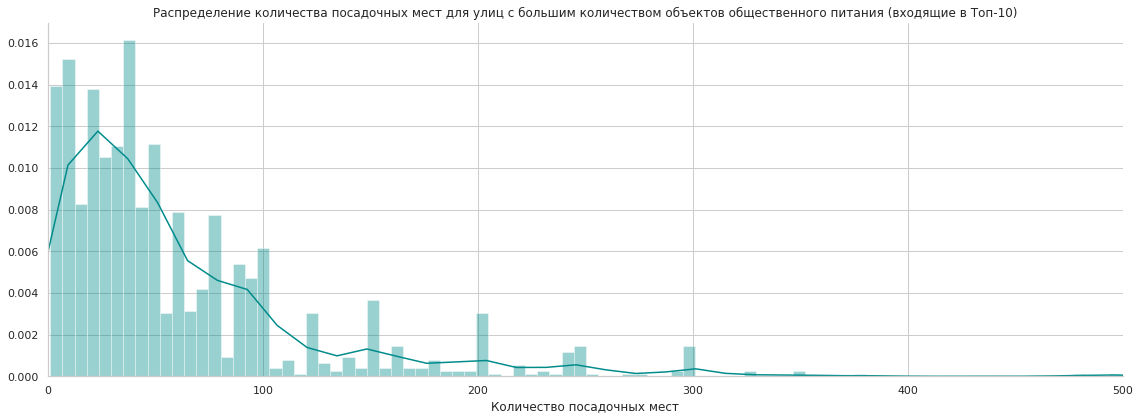

In [71]:
plt.figure(figsize=(16, 6))

ax = sns.distplot(df.query('street in @top10 and number !=0')['number'], bins = 300, color = 'darkcyan')
ax.set_title('Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания (входящие в Топ-10)')
ax.set(xlabel='Количество посадочных мест', xlim=(0, 500))
#задаем параметры текста подписей
sns.set_context("notebook", font_scale=1)

#убираем рамку, оставляя оси
sns.despine()
plt.tight_layout() #необходимо для того чтобы подписи не обрезались
#plt.savefig("figure11.png") # save as png
plt.show()

In [72]:
np.percentile(df.query('street in @top10 and number !=0')['number'], [50,85,90,95,99])

array([ 40., 100., 150., 200., 300.])

Среди заведений на топ-10 улиц, если не учитывать заведения с нулями в графе "кол-во посадочных мест", среднее (медианное значение) - 40 пасадочных мест (столько же, сколько и в целом по Москве). Всего 15% заведений имеют более 100 посадочных мест. По графику распределения видим небольшие пики на значениях кратных 50 (50, 100, 150, 200, 250, 300 посадочных мест). Первоначально возникла мысль, что количество посадочных мест может влиять на налогооблажение и именно такие значения указаны в документах, однако насколько я смог разобрать на налогообложение влияет только площадь помещения заведений общепита (которая в свою очередь никак не привязана к количеству посадочных мест). Вероятно такие сплески вызываны тем, что в заполняя эту графу на картах (или при оформлении документов) владельцы просто округляют количество посадочных мест, или же это связано с другими нормативными актами (например по пожарной безопасности или санпину).

In [73]:
df.query('street in @top10 and number !=0').groupby('street')['number'].agg({'mean','median','max'}).reset_index()

street  median       mean   max
0        варшавское шоссе    40.0  59.902778   500
1         каширское шоссе    33.0  63.618557   680
2    кировоградская улица    47.0  76.476744   300
3    кутузовский проспект    50.0  98.948980  1700
4  ленинградский проспект    44.5  56.512500   625
5      ленинский проспект    48.0  67.724638   495
6  пресненская набережная    30.0  49.076923   478
7    проспект вернадского    40.0  68.000000  1288
8           проспект мира    50.0  66.614583   326
9       профсоюзная улица    40.0  60.608392   240

Для всех улиц можно отметить большую разницу между средним количеством мест и медианой. Так, для Кутузовского проспекта медиана почти в два раза меньше среднего. (При этом именно на Кутузовском находится "заведение рекордсмен", расщитанное на 1700 гостей). Можем сделать предположении о концентрации заведений с большим количеством посадочных мест на этих улицах.

#### Выводы по работе: <a id="answers"></a>
Мы провели анализ заведений общественного питания, города Москвы.

В Москве из более чем 15 тысяч заведений общественного питания: 
- Кафе - 6099  заведений (более 40%)
- Столовые - 2500 заведений (17 %)
- Ресторан - 2285 заведений (15%)  


Несетевых заведений в 4 раза больше чем сетевых.  

Средняя максимальная вместительность среди всех заведений г. Москвы - 40 мест  

Топ-3 самых популярных улиц: проспект Мира, Профсоюзная улица, Ленинградский проспект.  


Самые популярные улицы сконцентрированы в западной части столицы, при этом чуть больше улиц на севере, северо-западе и они находятся на отдалении от центра. Можно сказать на выездах из города.
Среди заведений на топ-10 улиц, среднее (медианное значение) - 40 пасадочных мест, что не отличается от всего датасета. Всего 15% заведений имеют более 100 посадочных мест.  
Среди топ-10 улиц Москвы на которых суммарно находятся 1508 заведений, чуть менее половины - "кафе" (635 заведений), следом идут рестораны (291 заведение) и предприятия быстрого обслуживания (258 заведений).  
Для самых популярных улиц можно отметить большую разницу между средним количеством мест и медианой. Так, для Кутузовского проспекта медиана почти в два раза меньше среднего. (При этом именно на Кутузовском находится "заведение рекордсмен", расщитанное на 1700 гостей). Можем сделать предположении о концентрации заведений с большим количеством посадочных мест на этих улицах.




<div class="alert alert-block alert-danger">
Комментарий ревьюера v. 1:
    
Ты провёл подробный анализ данных и сделал верные выводы, молодец!
    
    
Однако нужно добавить рекомендации по открытию нового заведения.
</div>

<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ СТУДЕНТА:</b>
    
Немного не понял задание и не стал давать рекомендации инвесторам. Возможно так как самому не очень близка эта идея с робот-кафе) Исправляюсь.
    
Итак: 
Несетевые заведения формата "кафе" - самые популярные в столице среди общепита, но это не означает что рынок перенасыщен. Открытие заведения нового формата, недолжно смущать большое количество заведений схожих по "типу - кафе", "вместительности - небольшое количество мест" и "несетевой тип". Наоборот большое количество таких заведений дает понять, что локальные и необычные форматы могут работать и работают.  
Что касается месторасположения. Думаю сама идея (это же Робо-кафе!!!) предпологает, что люди готовы будут поехать в любую точку города, чтобы впервые испытать такой опыт - взаимодействие в кафе исключительно с роботами. Поэтому месторасположение не будет сильно влиять на популярность (если рассматривать места с сопоставимыми проходимостью и удаленностью от метро (транспорта)). Не будем забывать правило трех "локейшн". Заведения робот-кафе могут привлекать поситителей с детьми - следовательно может сработать вариант открытия в крупном спальном районе, в месте с большой проходимостью. Не каждая мама с ребенком, а то и не одним, еще с какой-то долей вероятности с коляской, поедет в центр (общественный транспорт, место для парковки и прочие неудобства). В то же время вариант с открытием в центре города, где больше туристические потоки, тоже нужно рассматривать.
Вероятно стоит принимать решения зная конкретные цифры про проходимости (могут ли они быть сопоставимы внутри садового кольца и в спальных районах на окраинах). Плюс не будем забывать о ценниках за квадрат, не очень знаком с московскими, но что-то подсказывает, что это может стать решающим при принятии решения.
Из других пунктов, пришло в голову, что заведение такого формата, где взаимодействие происходит с роботами, может быть популярно в связи с событиями последнего года, когда многие люди отказываются от лишних контактов с себе подобными. А вот роботы - другое дело! 


<div class="alert alert-block alert-warning">
Комментарий ревьюера v. 2:
    
Отличные рекомендации :) Ещё следовало бы отметить какое число посадочных мест будет оптимальным. Да, согласна в период карандина кафе с роботами в качестве персонала это отличная идея.
</div>

#### Презентация <a id="prt2"></a>

Прикрепляю ссылку на презентацию.
Буду рад получить критику на проделанную работу

**Презентация:** <https://drive.google.com/file/d/1oqUZBcPbZH0jdjCYaX9ISOlUyNe6JSXW/view?usp=sharing> 


<div class="alert alert-block alert-danger">
Комментарий ревьюера v. 1:
    
В целом у Тебя хорошая презентация, но нужно добавить слайд с постановкой задачи/проблемы и рекомендации по открытию нового заведения. Кроме того, обычно в презентациях есть последний слайд "Спасибо за внимание!" или что-то похожее. Помимо этого можно улучшить дизайн презентации: https://www.pinterest.ru/pin/368943394472448360/ , https://slidebean.com/templates/restaurant-business-plan-template 
</div>

<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ СТУДЕНТА:</b>

Обновленная презентация по ссылке: <https://drive.google.com/file/d/1XUnTpUAvi-9a5Nnf0UY5BzU4F9cwBHJA/view?usp=sharing>

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Молодец, что внёс доработки. Отличный последний слайд :)
</div>

<div class="alert alert-block alert-info">
<b>КОММЕНТАРИЙ СТУДЕНТА:</b>

Светлана, спасибо за ревью и за полезные ссылки оставленные в проекте!